In [1]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') 
plt.rcParams['figure.figsize'] = (9,6)


# Helpful for animations
# https://stackoverflow.com/questions/35532498/animation-in-ipython-notebook/46878531#46878531

In [14]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
from IPython.display import HTML, display, clear_output

def lissajous(k,periods,online=True):
    plt.rcParams['figure.figsize'] = (6,4)
    plt.rcParams['figure.dpi']=100
    plt.rcParams['animation.bitrate']=4000
    
    
    fig, ax = plt.subplots()

    ax.set_aspect('equal')

    axesRange=np.sqrt(2)
    ax.set_xlim((-axesRange, axesRange))
    ax.set_ylim((-axesRange, axesRange))

    line, = ax.plot([], [], lw=2)

    omega=np.sqrt(1+2*k)     # 2nd frequency
    T=periods*2*np.pi        # max time
    N=int(5*T)               # number of frames in animation
    pf=2                     # points per frame


    phis = np.zeros((2,N*pf))  # positions

    def animate(i):
        t = np.linspace(i*T/N,(i+1)*T/N,pf,endpoint=False);
        fromNormalModes = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])
        phis[:,i*pf:(i+1)*pf]=fromNormalModes@np.array([np.sin(t), 1/omega*np.sin(omega*t)])
        line.set_data(phis[0,:(i+1)*pf],phis[1,:(i+1)*pf])

    # Show individual frames while rendering.
    # Good for online demonstration, not suitable for web export
    if online:
        for i in range(N):
            animate(i)
            display(fig)
            clear_output(wait=True)
        #    time.sleep(.1) # Anyway super-slow
    else:
        anim = animation.FuncAnimation(fig, animate,
                                       frames=N, interval=20, 
                                       blit=False)
        return(HTML(anim.to_html5_video()))

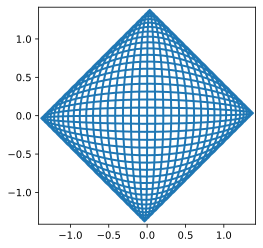

In [15]:
display(lissajous(0.05125,21, False));

# More pretty Lissajous

k= 7.5


k= 0.624


k= 0.345


k= 0.05125


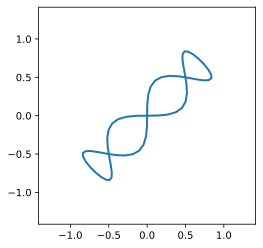

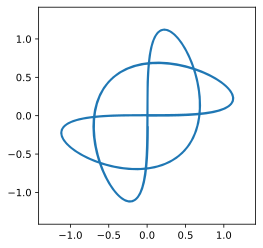

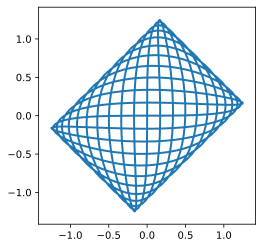

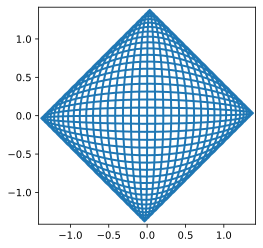

In [16]:
# Parameter: (Federkonstante, Perioden)
params = ((7.5,2),(0.624,5), (0.345, 12), (0.05125,21))

for p in params:
    print("k=", p[0])
    display(lissajous(*p, False))